In [1]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/uk_own/'

#results_dir = 'exp1_results/'
#graph_xlim = (0, 13)
#graph_ylim = (3, 9)
#gridsize = 1000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp2_results/'
#graph_xlim = (-1, 15)
#graph_ylim = (2, 25)
#gridsize = 1000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp3_results/'
#graph_xlim = (0, 13)
#graph_ylim = (3, 9)
#gridsize = 1000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp4_results/'
#graph_xlim = (-2, 15)
#graph_ylim = (-1, 20)
#gridsize = 200
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp5_results/'
#graph_xlim = (0, 15)
#graph_ylim = (3, 9)
#gridsize = 500
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp6_results/'
#graph_xlim = (-2, 15)
#graph_ylim = (1, 17)
#gridsize = 2000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp7_results/'
#graph_xlim = (0, 15.6)
#graph_ylim = (0, 8.5)
#gridsize = 400
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

#results_dir = 'exp8_results/'
#graph_xlim = (-5, 30)
#graph_ylim = (-20, 15)
#gridsize = 1000
#dim_ax = 'dim_ax_1'
#dim_ay = 'dim_ay_1'

results_dir = 'exp9_results/'
graph_xlim = (-5, 20)
graph_ylim = (-5, 10)
gridsize = 1000
dim_ax = 'dim_ax_1'
dim_ay = 'dim_ay_1'

# exp1, exp2, exp3, exp4, exp5, exp6
#dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

# exp7, exp8, exp9
dimension_names_to_visualize = ['Favors immigration restrictions', 'EU integration party dissent']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# UK
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'UKOwn_reference_group.csv'
group_attitudes_file = data_dir + 'UKOwn_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'UK'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

graph_file = data_dir + results_dir + 'uk_and_party.pdf'

['ches2019_immigrate_policy', 'ches2019_eu_dissent']


In [2]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_immigrate_policy,ches2019_eu_dissent,ches2019_galtan_dissent
0,0,1.456718,4.084089,2.508084
1,1,0.666931,5.742915,2.550783
2,2,4.416551,1.852021,2.610801
3,3,0.966201,3.086038,2.373792
4,4,1.648931,0.455448,2.231020


In [3]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(565, 4)
(565, 6)
(527, 7)
(527, 14)


,entity,ches2019_immigrate_policy,ches2019_eu_dissent,ches2019_galtan_dissent,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,0,1.212545,2.125741,2.358236,0,0,Labour,blue,-0.1,0.2,0.1,0.1,0.1,0.1
1,1,2.667712,7.018320,2.892497,1,0,Labour,blue,-0.1,0.2,0.1,0.1,0.1,0.1
2,9,2.801610,6.844353,2.885310,9,0,Labour,blue,-0.1,0.2,0.1,0.1,0.1,0.1
3,12,1.449532,4.014085,2.526658,12,0,Labour,blue,-0.1,0.2,0.1,0.1,0.1,0.1
4,15,2.934906,6.724712,2.936420,15,0,Labour,blue,-0.1,0.2,0.1,0.1,0.1,0.1


In [4]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,Conservative,232
1,Green Party,1
2,Labour,174
3,Labour (Co-op),28
4,Liberal Democrat,39
5,Plaid Cymru,3
6,Scottish National Party,49
7,UK Independence Party,1


In [5]:
group_names_df.head(20)

,k,party
0,0,Labour
1,1,Conservative
2,2,Scottish National Party
3,3,Liberal Democrat
4,4,Labour (Co-op)
13,13,Plaid Cymru
15,15,Green Party
16,16,UK Independence Party


In [6]:
# also load/compute predicted dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
for c in group_dimensions_df.columns:
    if c != 'entity':
        group_dimensions_df.rename(columns = {c: c + '_pred'}, inplace = True)
        
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(17, 3)
(8, 10)


,ches2019_immigrate_policy_pred,ches2019_eu_dissent_pred,party,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,2.897714,5.733307,Labour,blue,-0.1,0.2,0.1,0.1,0.1,0.1
1,8.051210,3.478482,Conservative,green,-0.1,-0.3,0.1,0.1,0.1,0.1
2,2.820253,-0.696912,Plaid Cymru,#CD6090,-0.2,-0.3,0.1,0.1,0.1,0.1
3,1.516745,3.092942,Green Party,magenta,0.2,0.0,0.1,0.1,0.1,0.1
4,8.583439,0.947024,UK Independence Party,orange,0.2,0.0,0.1,0.1,0.1,0.1
5,2.223896,1.966109,Scottish National Party,#8968CD,0.2,0.0,0.1,0.1,0.1,0.1
6,4.268494,4.935991,Liberal Democrat,red,-0.1,0.2,0.1,0.1,0.1,0.1
7,2.827791,6.243057,Labour (Co-op),yellow,-0.1,0.2,0.1,0.1,0.1,0.1


In [7]:
# finally load real dimensions of parties and merge them with predicted ones

real_party_dimensions_df = pd.read_csv(group_attitudes_file)
real_party_dimensions_df = real_party_dimensions_df[['party'] + dimensions_to_visualize]
for c in real_party_dimensions_df.columns:
    if c != 'party':
        real_party_dimensions_df.rename(columns = {c: c + '_real'}, inplace = True)
real_party_dimensions_df.head(10)

all_party_dimensions_df = pd.merge(real_party_dimensions_df, group_dimensions_df, on = 'party', how = 'inner')
all_party_dimensions_df.head(10)

,party,ches2019_immigrate_policy_real,ches2019_eu_dissent_real,ches2019_immigrate_policy_pred,ches2019_eu_dissent_pred,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,Labour,3.529412,8.000,2.897714,5.733307,blue,-0.1,0.2,0.1,0.1,0.1,0.1
1,Conservative,7.588235,4.625,8.051210,3.478482,green,-0.1,-0.3,0.1,0.1,0.1,0.1
2,Scottish National Party,2.333333,1.500,2.223896,1.966109,#8968CD,0.2,0.0,0.1,0.1,0.1,0.1
3,Liberal Democrat,2.588235,1.250,4.268494,4.935991,red,-0.1,0.2,0.1,0.1,0.1,0.1
4,Labour (Co-op),3.529412,8.000,2.827791,6.243057,yellow,-0.1,0.2,0.1,0.1,0.1,0.1
5,Plaid Cymru,2.444444,1.200,2.820253,-0.696912,#CD6090,-0.2,-0.3,0.1,0.1,0.1,0.1
6,Green Party,1.705882,0.875,1.516745,3.092942,magenta,0.2,0.0,0.1,0.1,0.1,0.1
7,UK Independence Party,9.470589,0.250,8.583439,0.947024,orange,0.2,0.0,0.1,0.1,0.1,0.1


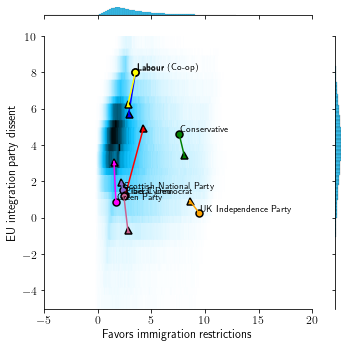

In [8]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row[dim_ax]), float(row[dim_ay]))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])

# followers
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, #) ,
                 joint_kws = dict(gridsize = gridsize)) 

# party positions
for _, row in all_party_dimensions_df.iterrows():
    # predicted
    g.ax_joint.plot(row[xdim + '_pred'], row[ydim + '_pred'], '^', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    # real
    g.ax_joint.plot(row[xdim + '_real'], row[ydim + '_real'], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    # line between them
    g.ax_joint.plot([row[xdim + '_pred'], row[xdim + '_real']],
                    [row[ydim + '_pred'], row[ydim + '_real']], color = row[color_dim])
    
    # party name
    g.ax_joint.text(row[xdim + '_real'] + disp[row['party']][0],
                    row[ydim + '_real'] + disp[row['party']][1], row.party, 
                    color = 'black', fontsize = 9)

g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

plt.tight_layout()

plt.savefig(graph_file)

plt.show()